# Classification

As we've previously seen, classification is a supervised machine learning technique. This training involves analysing a set of features and predict a label on already-known label values. 

Once again, in this model we will focus on binary classification (two classes). We will predict whether a patient should be tested for diabetes based on some medical data.

## Reading the data

First step is to read the diabetes data.


In [1]:
import pandas as pd
 
data = pd.read_csv('./diabetes.csv')
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


We can see that the data consists of numerous features, and the label diabetic at the end. 0 means the person is not diabetic, whilst 1 means the person is diabetic.

## Data cleaning

The next step will be to separate the features $X$ from the labels $y$.

In [2]:
features = list(data.columns)
target = 'Diabetic'
 
features.remove('PatientID')
features.remove(target)
 
X = data[features]
y = data[target]

## Data distribution

We can see how data is distributed for each feature that we have.

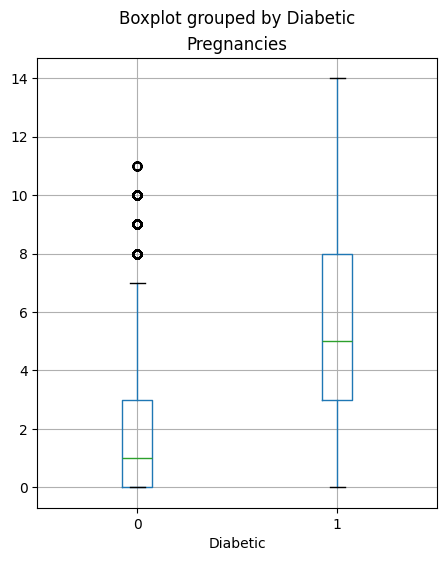

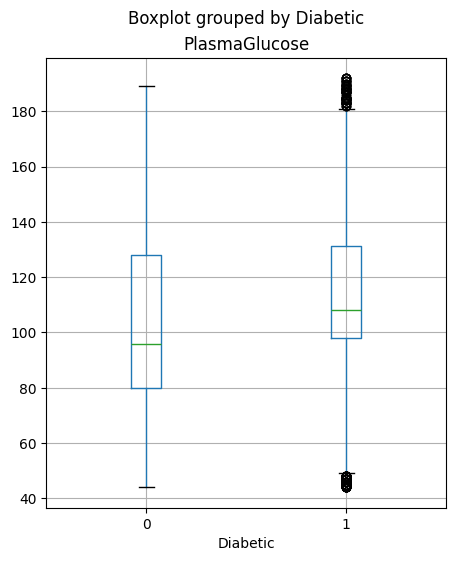

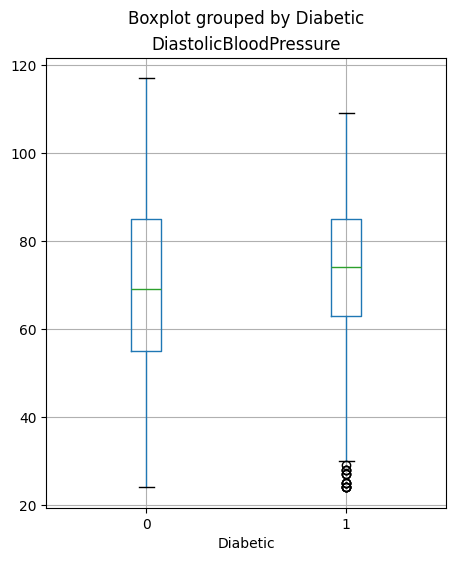

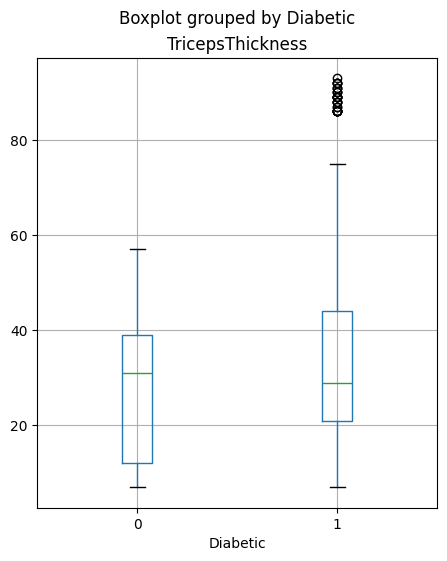

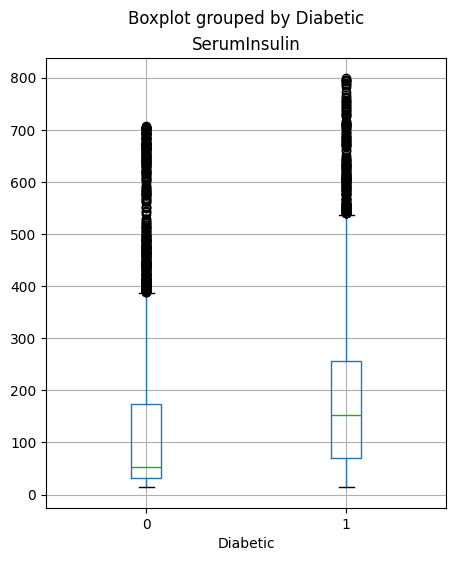

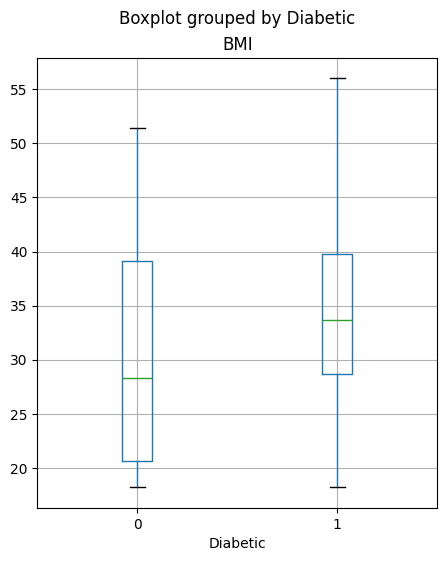

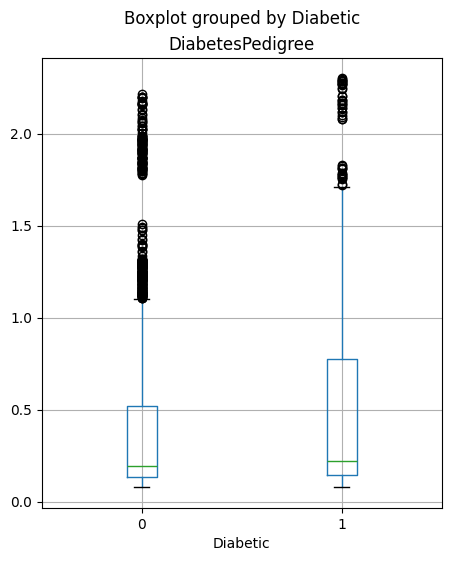

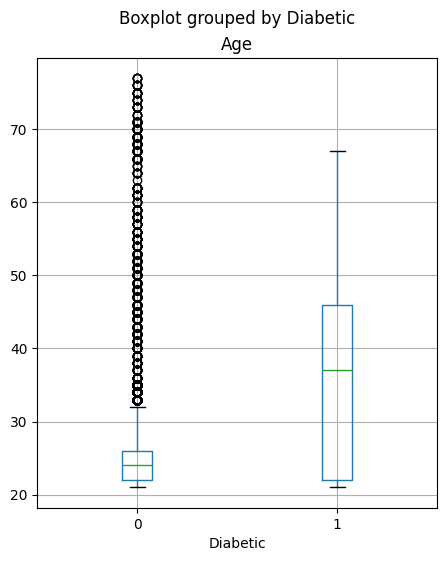

In [3]:
import matplotlib.pyplot as plt
 
for feature in features:
    data.boxplot(column=feature, by=target, figsize=(5,6))
    plt.title(feature)

If we look at Pregnancies and Age there is a different distribution for diabetic patients when compared to non-diabetic patients.

## Data Splitting

In order to test whether our trained model is performing well, we keep apart some of our data and then use this unseen data to test the prediction accuracy. 

We can start with a 70% training and 30% test split.

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (f'Training: {X_train.shape[0]}')
print (f'Test    : {X_test.shape[0]}')

## Train and Evaluate a Binary Classification Model

So now we can train the model using the features of X_train, with the labels of y_train. 

There are various algorithms that can be used, in this example Logistic Regression will be used (although it's called regression, it is used for classification). Apart from the training features, and labels, we will also set a regularization parameter. This is used to reduce bias in teh sample, and generalize to avoid overfitting.

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.001, random_state=42).fit(X_train, y_train)

c:\Users\deadr\Documents\MCAST\ACI2024_25_SWD6.3A\ACI\aci-env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now, the model is trained and we can use the test data to evaluate how well it predicts.

In [11]:
predictions = model.predict(X_test)

print (f'Predicted Labels : {predictions[:10]}')
print (f'Actual Labels    : {y_test.values[:10]}')

Predicted Labels : [0 0 0 0 0 0 1 0 1 0]
Actual Labels    : [0 1 0 0 0 0 1 0 0 0]


Since there are quite a lot of results, it will be difficult to directly compare the arrays of the prediction agains the actual labels.

We can use metrics to evaluate the performance of the model. For instance we can use accuracy metric.

In [13]:
from sklearn.metrics import accuracy_score, f1_score

print(f'Accuracy : {accuracy_score(predictions,y_test):.2f}')
print(f'F1 Score : {f1_score(predictions,y_test):.2f}')

Accuracy : 0.78
F1 Score : 0.63


The accuracy is a percentage ranging from 0 (useless) to 1 (100% correctly predicted). In this case we have an accuracy of 78.93%.

Although accuracy might give us a quick indication of how well our model is performing. We can use other metrics to evaluate our model.

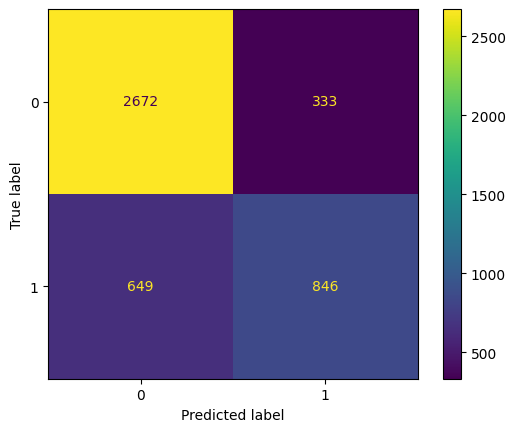

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

Aw we have seen in previous lessons when we have created the confusion matrix, we have these automatically worked out for us.

|Metric|Description|
|---|---|
|Precision|What proportion of predictions for this class were correct?|
|Recall|Out of all the instances of this class (in the test dataset), how many did the model identify?|
|F1-Score|An average metric based on precision and recall|
|Support|How many instances of the class are there in this test dataset|

The report also includes the averages including a weighted one, that allows for an imbalance in the class distribution.

Since this is a binary distribution, the 1 class determines if the person is diabetic. So this metric answers the questions:
- Of all the patients predicted as diabetic, how many of them are actually diabetic? (72.42%)
- Of all the patients who are actually diabetic, how many did the model identify? (60.37%)

Overall precision:  0.7242472266244057
Overall recall   :  0.6036988110964333


We can also produce the confuctions matrix which is based on the possible prediction outcomes:
- True Positives: Predicted label and actual label are both 1
- False Positives: Predicted label is 1, but actual label is 0
- False Negatives: Predicted label is 0, but actual label is 1
- True Negatives: Predicted label and actual label are both 0

When plotting it in Python it follows this pattern:
<table>
<tr>
<td>TN</td>
<td>FP</td>
</tr>
<tr>
<td>FN</td>
<td>TP</td>
</tr>

</table>


[[2638  348]
 [ 600  914]]


Until now, we have consired the predictions to be either 1 or 0, and we did not consider the probability. The threshold value is 0.5 and this is used to determine which label is assigned. 

If you want to see the assigned probabilities for each prediction we can use *predict_proba* which gives us the probability pairs for each case.

[[0.81651727 0.18348273]
 [0.96298333 0.03701667]
 [0.80862083 0.19137917]
 ...
 [0.60688422 0.39311578]
 [0.10672996 0.89327004]
 [0.63865894 0.36134106]]


## Different Algorithm

We can also use a different algorithm to see how it performs against the Linear Regression model.

Accuracy score : 0.9338
F1 score : 0.8987


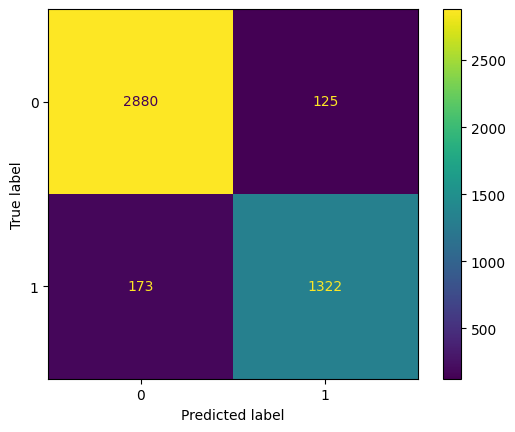

In [15]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier().fit(X_train, y_train)
predictions_2 = model_2.predict(X_test)
y_scores_2 = model_2.predict_proba(X_test)

print (f'Accuracy score : {accuracy_score(y_test, predictions_2):.4f}')
print (f'F1 score : {f1_score(y_test, predictions_2):.4f}')

cm = confusion_matrix(y_test, predictions_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()

We can see that overall this model is much better have all scores very close to 100%.

## ROC chart

Another way to determine how well a model performs, is to show the ROC chart. This examines the true positive rate (recall) and  teh false positive rate. These rare plotted against all possible thresholds to form this chart.

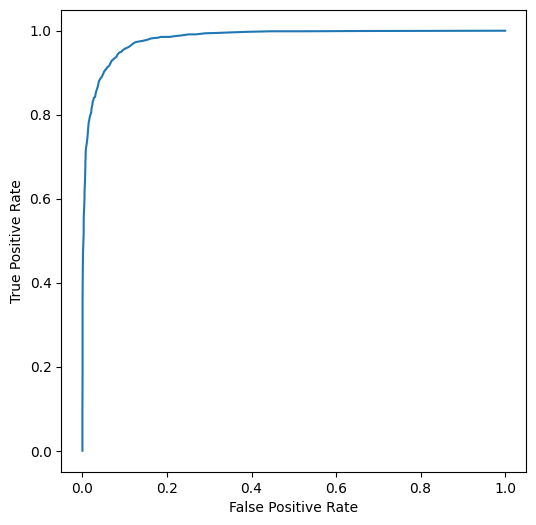

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,y_scores_2[:,1])

fig = plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.xlabel(('False Positive Rate'))
plt.ylabel(('True Positive Rate'))
plt.show()

This chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. 

A perfect classifier would have a curve that goes straight up the left side, and then straight across the top.

The diagonal line shows the probability of predicting correctly at a 50/50 random prediction, so you need the curve as far away from it as possible.

The area under the curve (AUC) is a value between 0 and 1. The closer it is to 1 the better the model.

This can also be calculated:

In [18]:
from sklearn.metrics import roc_auc_score

print (f'AUC : {roc_auc_score(y_test,y_scores_2[:,1])}')

AUC : 0.981804128014068


Let's repeat the ROC chart with the forest predictor.

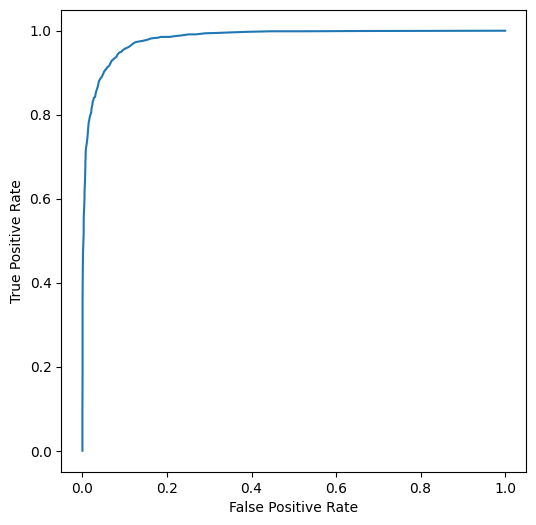

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,y_scores_2[:,1])

fig = plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.xlabel(('False Positive Rate'))
plt.ylabel(('True Positive Rate'))
plt.show()

We can see that the curve is much closer to 1. Let's calculate it.

In [21]:
from sklearn.metrics import roc_auc_score

print (f'AUC : {roc_auc_score(y_test,y_scores_2[:,1])}')

AUC : 0.981804128014068
